# Softmax Regression w/ Batch Gradient Descent


In [65]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2042)

In [33]:
# load iris dataset
from sklearn import datasets
iris = datasets.load_iris()

X = iris["data"][:, (2,3)]
y = iris["target"]

In [34]:
# add bias term for every instance (x0 = 1)
X_with_bias = np.c_[np.ones([len(X), 1]), X]

In [35]:
# split dataset
test_ratio = 0.2
validation_ratio = 0.2
total_size = len(X_with_bias)

test_size = int(total_size * test_ratio)
validation_size = int(total_size * validation_ratio)
train_size = total_size - test_size - validation_size

rnd_indices =  np.random.permutation(total_size)

X_train = X_with_bias[rnd_indices[:train_size]]
y_train = y[rnd_indices[:train_size]]
X_valid =  X_with_bias[rnd_indices[train_size: -test_size]]
y_valid = y[rnd_indices[train_size: -test_size]]
X_test =  X_with_bias[rnd_indices[-test_size:]]
y_test = y[rnd_indices[-test_size:]]

## One-hot Encoding
For softmax regression we need to have target outputs in a format such that we can determine which of the three classes it belongs to. Hence, for each target output we convert the integer value (0,1 or 2) to a three integer value representing the respective probability for each class possibility. 


In [36]:
def to_one_hot(y):
  n_classes = y.max() + 1
  m = len(y)
  Y_one_hot = np.zeros((m, n_classes))
  Y_one_hot[np.arange(m), y] = 1
  return Y_one_hot

In [37]:
print(y_train[:10]) 

[0 1 2 1 1 0 1 1 1 0]


In [38]:
to_one_hot(y_train[:10])

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [39]:
# create target class probabilities for all data sets
y_train_one_hot = to_one_hot(y_train)
y_valid_one_hot = to_one_hot(y_valid)
y_test_one_hot = to_one_hot(y_test)

In [40]:
# create softmax function
def softmax(logits):
  exps = np.exp(logits)
  exp_sums = np.sum(exps, axis=1, keepdims=True)
  return exps / exp_sums

In [41]:
# define number of inputs and outputs 
n_inputs = X_train.shape[1]
n_outputs = len(np.unique(y_train))

## Training

In [44]:
eta =  0.01
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
  logits = X_train.dot(Theta)
  Y_proba  = softmax(logits)
  loss = -np.mean(np.sum(y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
  error = Y_proba - y_train_one_hot
  if iteration % 500 == 0:
    print(iteration, loss)
  gradients = 1/m * X_train.T.dot(error)
  Theta =  Theta - eta * gradients

0 5.173284880908112
500 0.8258143504756522
1000 0.6740383508681776
1500 0.5891518016822946
2000 0.5353052890403674
2500 0.4975988211901051
3000 0.469220320068328
3500 0.4467104744290491
4000 0.4281482798645294
4500 0.41238656131534807
5000 0.3986986115898958


In [45]:
Theta

array([[ 2.96506788, -1.31523785, -2.75290651],
       [-0.37388472,  1.16174385,  0.478946  ],
       [-1.0446009 , -0.97856165,  2.04772298]])

In [47]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

0.9333333333333333

In [57]:
# with regularisation

eta =  0.01
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7
# regularisation parameter
alpha = 0.1 

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
  logits = X_train.dot(Theta)
  Y_proba  = softmax(logits)
  xentropy_loss = -np.mean(np.sum(y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
  l2loss = 1/2 * np.sum(np.square(Theta[1:]))
  loss = xentropy_loss + alpha * l2loss
  error = Y_proba - y_train_one_hot
  if iteration % 500 == 0:
    print(iteration, loss)
  gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]
  Theta =  Theta - eta * gradients

0 4.389185406058857
500 0.8740651552424703
1000 0.7413793106713007
1500 0.6706507551994559
2000 0.6281925712292238
2500 0.6002535481480255
3000 0.5805649712612421
3500 0.5659609673337429
4000 0.5546996539679785
4500 0.5457526648460669
5000 0.5384765914747358


In [59]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

0.9

In [ ]:
# with early stopping
eta = 0.1 
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7
alpha = 0.1  # regularization hyperparameter
best_loss = np.infty

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    error = Y_proba - y_train_one_hot
    gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]
    Theta = Theta - eta * gradients

    logits = X_valid.dot(Theta)
    Y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(y_valid_one_hot * np.log(Y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    if iteration % 500 == 0:
        print(iteration, loss)
    if loss < best_loss:
        best_loss = loss
    else:
        print(iteration - 1, best_loss)
        print(iteration, loss, "early stopping!")
        break

In [63]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_scoren

1.0

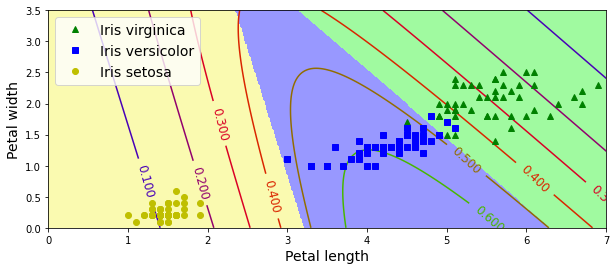

In [66]:
# plotting model predictions on whole dataset


x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
X_new_with_bias = np.c_[np.ones([len(X_new), 1]), X_new]

logits = X_new_with_bias.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

zz1 = Y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()


In [68]:
logits = X_test.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_test)
accuracy_score

0.9333333333333333